In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
DATA_PATH = "../data/final_tweets/"

train_df = pd.read_csv(DATA_PATH +'train_df.csv')
valid_df = pd.read_csv(DATA_PATH +'validate_df.csv')
test_df = pd.read_csv(DATA_PATH + 'test_df.csv')

X_train = train_df['tweet_text']
Y_train = train_df['text_info']

X_valid = valid_df['tweet_text']
Y_valid = valid_df['text_info']

X_test = test_df['tweet_text']
Y_test = test_df['text_info']

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)

# train data
tok.fit_on_texts(X_train)
train_sequences = tok.texts_to_sequences(X_train)
train_sequences_matrix = sequence.pad_sequences(train_sequences,maxlen=max_len)

# validate data
valid_sequences = tok.texts_to_sequences(X_valid)
valid_sequences_matrix = sequence.pad_sequences(valid_sequences,maxlen=max_len)

# test_data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [5]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)

# train data
tok.fit_on_texts(X_train)
train_sequences = tok.texts_to_sequences(X_train)
train_sequences_matrix = sequence.pad_sequences(train_sequences,maxlen=max_len)

# validate data
valid_sequences = tok.texts_to_sequences(X_valid)
valid_sequences_matrix = sequence.pad_sequences(valid_sequences,maxlen=max_len)

# test_data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [6]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(2*layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

## Without Early Stopping -> Overfitting

In [7]:
model = RNN()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

training_history = model.fit(train_sequences_matrix,Y_train,batch_size=32,epochs= 8,
          validation_data = (valid_sequences_matrix, Y_valid))

accr = model.evaluate(test_sequences_matrix,Y_test)

Epoch 1/8
280/280 [==============================] - 17s 61ms/step - loss: 0.4671 - accuracy: 0.7838 - val_loss: 0.4003 - val_accuracy: 0.8239
Epoch 2/8
280/280 [==============================] - 16s 55ms/step - loss: 0.3793 - accuracy: 0.8361 - val_loss: 0.3935 - val_accuracy: 0.8286
Epoch 3/8
280/280 [==============================] - 15s 55ms/step - loss: 0.3569 - accuracy: 0.8455 - val_loss: 0.3958 - val_accuracy: 0.8255
Epoch 4/8
280/280 [==============================] - 16s 56ms/step - loss: 0.3402 - accuracy: 0.8518 - val_loss: 0.3946 - val_accuracy: 0.8265
Epoch 5/8
280/280 [==============================] - 16s 56ms/step - loss: 0.3231 - accuracy: 0.8606 - val_loss: 0.3946 - val_accuracy: 0.8208
Epoch 6/8
280/280 [==============================] - 16s 56ms/step - loss: 0.3069 - accuracy: 0.8679 - val_loss: 0.4143 - val_accuracy: 0.8286
Epoch 7/8
280/280 [==============================] - 16s 56ms/step - loss: 0.2912 - accuracy: 0.8762 - val_loss: 0.4337 - val_accuracy: 0.8140

In [25]:
def plot_summaries(data1, data2, title, ylabel,fname):
    plt.plot(data1)
    plt.plot(data2)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig(fname+".png")

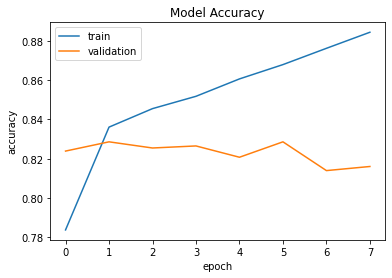

In [27]:
plot_summaries(training_history.history['accuracy'],training_history.history['val_accuracy'],\
              "Model Accuracy", "accuracy", "imgs/acc_notES")

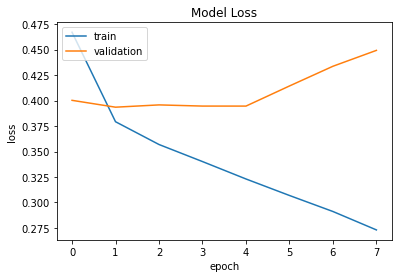

In [28]:
plot_summaries(training_history.history['loss'],training_history.history['val_loss'],\
              "Model Loss", "loss","imgs/loss_notES")

## With Early Stopping -> Only 2 Epochs

In [20]:
model_ES = RNN()
model_ES.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
training_history_ES = model_ES.fit(train_sequences_matrix,Y_train,batch_size=64,epochs=10,
          validation_data = (valid_sequences_matrix, Y_valid),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.001)])
accr = model_ES.evaluate(test_sequences_matrix,Y_test)

Epoch 1/10
140/140 [==============================] - 10s 73ms/step - loss: 0.4797 - accuracy: 0.7778 - val_loss: 0.3967 - val_accuracy: 0.8281
Epoch 2/10
140/140 [==============================] - 10s 71ms/step - loss: 0.3718 - accuracy: 0.8380 - val_loss: 0.3954 - val_accuracy: 0.8260
Epoch 3/10
140/140 [==============================] - 10s 72ms/step - loss: 0.3556 - accuracy: 0.8465 - val_loss: 0.3892 - val_accuracy: 0.8182
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3565 - accuracy: 0.8376


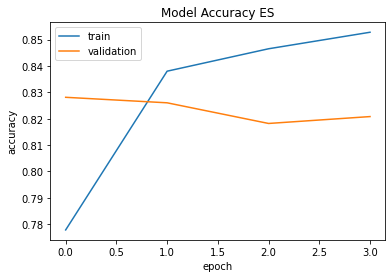

In [29]:
plot_summaries(training_history_ES.history['accuracy'],training_history_ES.history['val_accuracy'],\
              "Model Accuracy ES", "accuracy", "imgs/acc_ES")

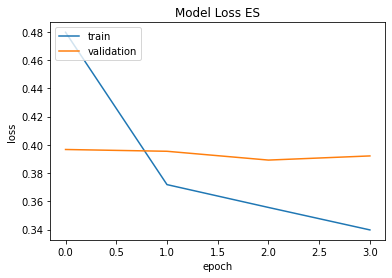

In [30]:
plot_summaries(training_history_ES.history['loss'],training_history_ES.history['val_loss'],\
              "Model Loss ES", "loss","imgs/loss_ES")